In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import matplotlib.ticker as ticker
from sklearn.ensemble import IsolationForest

In [10]:
def draw_(df, file_name, x_labels, y_label, subplot_num, colors=['b', 'g', 'r', 'c', 'y', 'k'], std_num=3):
    
    df_ymin = df[y_label].min()
    df_ymax = df[y_label].max()
    # df_ymean = df[y_label].mean()
    y_std = df[y_label].std()

    for icol in range(len(x_labels)//subplot_num+1):
        # Set graphics and axes
        col_size = min((icol+1)*subplot_num, len(x_labels)) - icol*subplot_num
        if col_size == 0:
            break
        fig, ax = plt.subplots(1, col_size, figsize=(8, 6), sharey=True)
        ax = np.atleast_1d(ax).tolist()
        sub_x_labels = x_labels[icol*subplot_num: min((icol+1)*subplot_num, len(x_labels))]

        for i, x_label in enumerate(sub_x_labels):
            df_xmin = df[x_label].min()
            df_xmax = df[x_label].max()
            df_xmean = df[x_label].mean()
            x_std = df[x_label].std()
            # Draw a line chart or other graphics as needed
            ax[i].plot(df[x_label], df[y_label], colors[i]+'-', linewidth=2)
            # Set x-axis scale
            ax[i].set_xlim(df_xmin, df_xmax)
            ax[i].set_xticks(np.arange(df_xmean-x_std*std_num, df_xmean+x_std*std_num, x_std))
            ax[i].set_xticklabels([f'{val:.2f}' for val in np.arange(df_xmean-x_std*std_num, df_xmean+x_std*std_num, x_std)])
            # Set y-axis range and direction
            ax[i].yaxis.set_ticks(np.arange(df_ymin, df_ymax, y_std))
            ax[i].set_yticklabels([f'{val:.2f}' for val in np.arange(df_ymin, df_ymax, y_std)])
            # ax[i].set_yscale('log')
            # Set other properties
            ax[i].set_xlabel(x_label, fontsize=8)
            ax[i].grid(which='minor', axis='both')
            ax[i].locator_params(axis='x', nbins=5)
            ax[i].tick_params(axis='x', labelsize=8, rotation=45)
        ax[0].set_ylabel("True Depth", fontsize=8)
        # Display graphics
        plt.title(f'{file_name}', loc='left')
        plt.show()


In [11]:
# Function for drawing the respective relationships between true depth and all features.
def draw_BN(files):
    for file in files:
        df = pd.read_csv(file)
        file_name = os.path.basename(file)
        print(file)
        y_label = 'true depth'
        x_labels = []
        for col in df.columns:
            if 'Unnamed:' in col:
                continue
            if col != 'closest_depth':
                x_labels.append(col)
            else:
                break
        draw_(df, file_name, x_labels, y_label, 5, std_num=5)

In [12]:
# Function for drawing the relationship between true depth and PERMEABILITY (HORIZONTAL)
def draw_H(files, remove_outliers):
    for file in files:
        df = pd.read_csv(file)
        file_name = os.path.basename(file)
        print(file)
        y_label = 'true depth'
        x_labels = []
        for col in df.columns:
            if 'Unnamed:' in col:
                continue
            if 'HORIZONTAL' in col:
                x_labels.append(col)
                # df[col] = df[col].astype(float)
                df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
        if remove_outliers:
            df = remove_outliers_iqr(df, [y_label])
        draw_(df, file_name, x_labels, y_label, 1, std_num=5)

In [13]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column_name):
    clf = IsolationForest(contamination=0.1)
    outliers = clf.fit_predict(df[column_name])
    # Create a mask to filter out outliers
    mask_no_outliers = outliers != -1
    df_cleaned = df[mask_no_outliers]
    return df_cleaned

In [14]:
# Function for drawing the result of classification of a csv file
def draw_C(csv_file_path):
    data = pd.read_csv(csv_file_path)
    facies_classes = data['Facies Class Name'].unique()
    colors = plt.cm.get_cmap('tab20', len(facies_classes))
    facies_color_map = {facies: colors(i) for i, facies in enumerate(facies_classes)}

    fig, ax = plt.subplots(figsize=(4, 8))
    for _, row in data.iterrows():
        facies = row['Facies Class Name']
        start_depth = row['Start Depth']
        end_depth = row['End Depth']
        height = end_depth - start_depth
        ax.bar(1, height, bottom=start_depth, color=facies_color_map[facies], edgecolor='white', width=0.5)

    ax.set_xlim(0.5, 1.5)
    ax.set_ylim(data['Start Depth'].min(), data['End Depth'].max())
    ax.invert_yaxis()
    ax.set_xticks([])
    ax.set_ylabel('Depth')
    ax.set_title(f'Result of Classification on\n{os.path.basename(csv_file_path)}')

    labels = list(facies_color_map.keys())
    handles = [plt.Rectangle((0,0),1,1, color=facies_color_map[label]) for label in labels]
    # Position the legend outside the plot area to the right
    ax.legend(handles, labels, title="Facies Classes", loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

In [15]:
# Function for drawing the result of classification of all csv files in a folder
def draw_multiple_C(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            csv_file_path = os.path.join(folder_path, filename)
            print(f"Generating plot for: {filename}")
            draw_C(csv_file_path)

start draw Result of Classification
Generating plot for: 204-19-3a.csv


C:\Users\16002\AppData\Local\Temp\ipykernel_24564\2494143909.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(facies_classes))


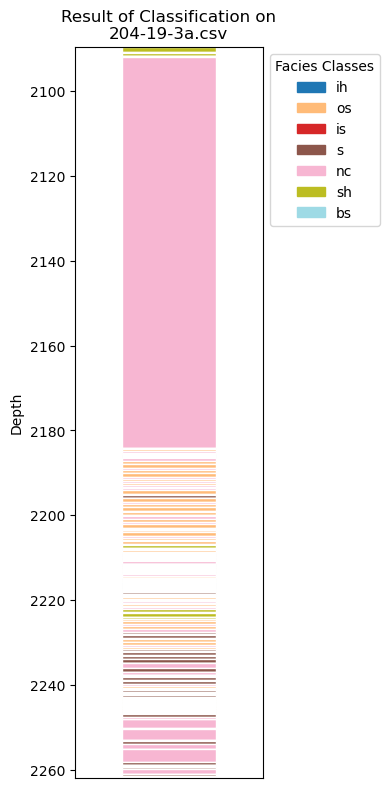

Generating plot for: 204-19-6.csv


C:\Users\16002\AppData\Local\Temp\ipykernel_24564\2494143909.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(facies_classes))


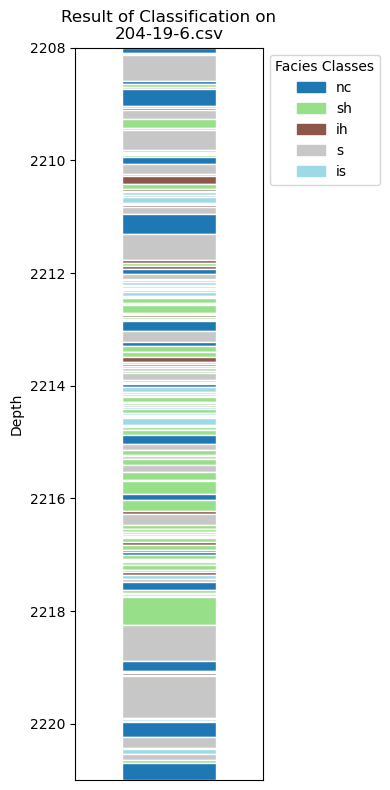

Generating plot for: 204-19-7.csv


C:\Users\16002\AppData\Local\Temp\ipykernel_24564\2494143909.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(facies_classes))


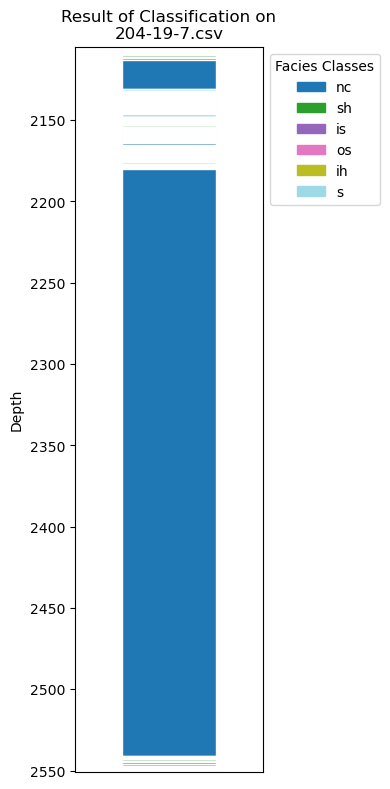

Generating plot for: 204-20-1.csv


C:\Users\16002\AppData\Local\Temp\ipykernel_24564\2494143909.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(facies_classes))


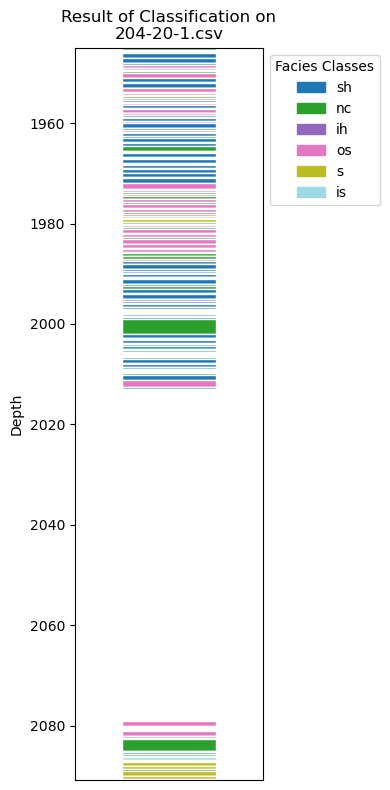

Generating plot for: 204-20-1Z.csv


C:\Users\16002\AppData\Local\Temp\ipykernel_24564\2494143909.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(facies_classes))


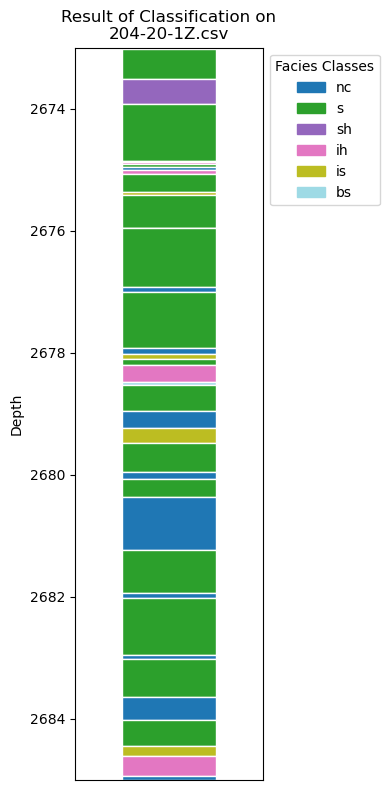

Generating plot for: 204-20-2.csv


C:\Users\16002\AppData\Local\Temp\ipykernel_24564\2494143909.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(facies_classes))


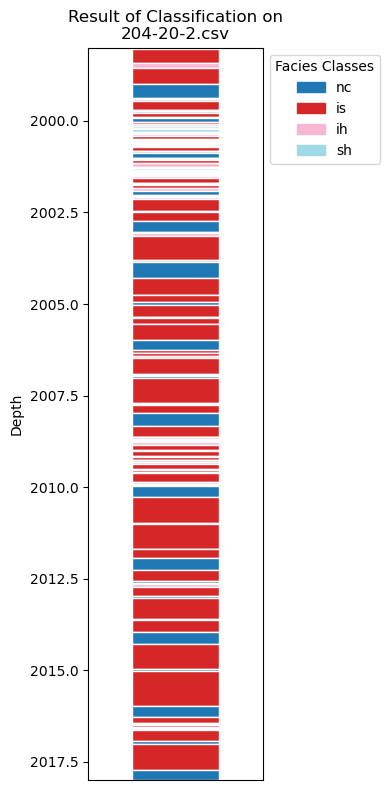

Generating plot for: 204-20-3.csv


C:\Users\16002\AppData\Local\Temp\ipykernel_24564\2494143909.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(facies_classes))


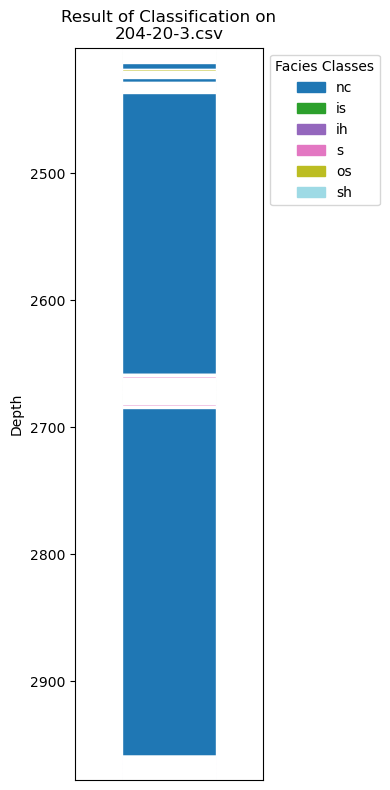

Generating plot for: 204-20-6a.csv


C:\Users\16002\AppData\Local\Temp\ipykernel_24564\2494143909.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(facies_classes))


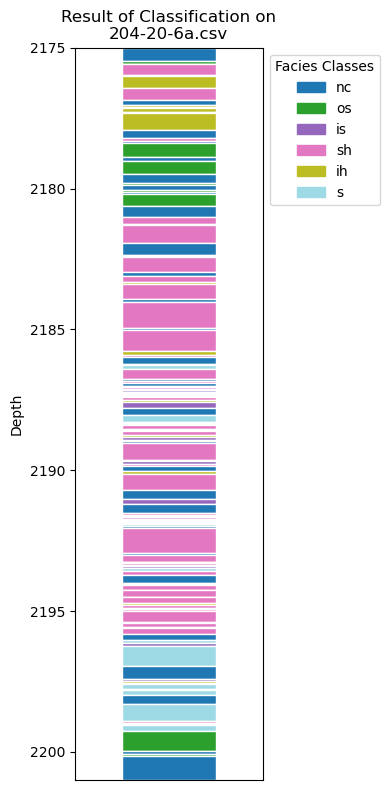

Generating plot for: 204-20a-7.csv


C:\Users\16002\AppData\Local\Temp\ipykernel_24564\2494143909.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(facies_classes))


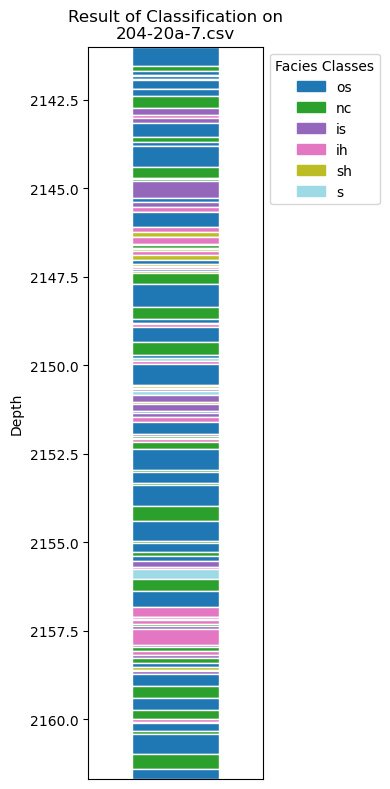

Generating plot for: 204-24a-6.csv


C:\Users\16002\AppData\Local\Temp\ipykernel_24564\2494143909.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(facies_classes))


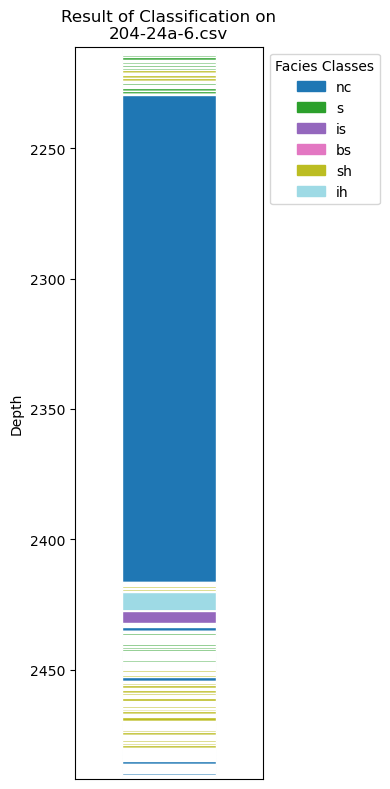

Generating plot for: 204-24a-7.csv


C:\Users\16002\AppData\Local\Temp\ipykernel_24564\2494143909.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(facies_classes))


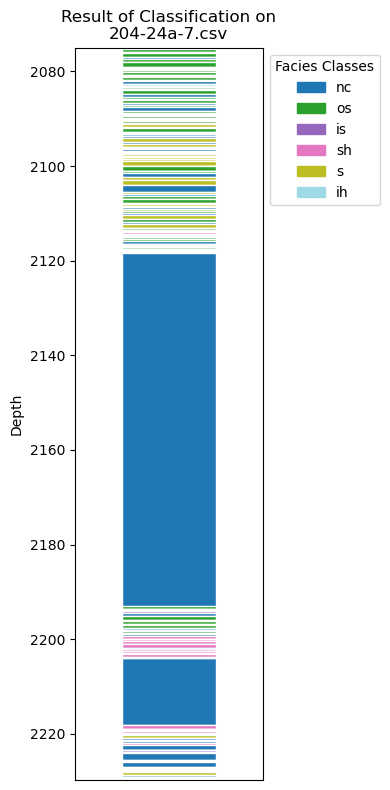

In [16]:

files = glob('data/labels/permeability/preprocessed_data/*')
files = [file for file in files if file.endswith('csv')]

# Uncomment the function calls as needed
# print('start draw BN')
# draw_BN(files)

# print('start draw Predicted PERMEABILITY (HORIZONTAL)')
# draw_H(files, True)
# print('success!')

print('start draw Result of Classification')
file_classification = 'data/labels/faciesclass'
draw_multiple_C(file_classification)
